Kuwahara filters are used for edge detection and noise reduction in images. They smooth the images while preserving the edges thereby reducing noise without blurring important details. The filter works by examining a neighborhood around each pixel and calculates the variance of pixel intensities and then apply different weights to the pixels basing on their intensities and position relative to the edges. 
It is a non-linear smoothing filter used for adaptive noise reduction in contrast to the linear filters which smooth the image but blur out the edges at the same time.

In [14]:
#pip install pykuwahara --user

In [15]:
import matplotlib.pyplot as plt
from PIL import Image

In [1]:
import cv2
from pykuwahara import kuwahara

image = cv2.imread('beach.jpg')

# default sigma
filt1 = kuwahara(image, method='mean', radius=3)
filt2 = kuwahara(image, method='gaussian', radius=3)   

cv2.imwrite('beach-kfilt-mean.jpg', filt1)
cv2.imwrite('beach-kfilt-gaus.jpg', filt2)

True

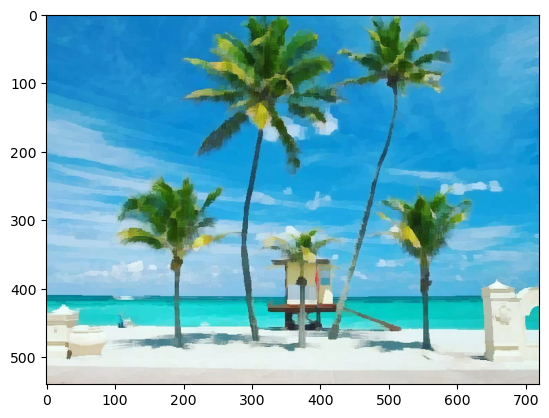

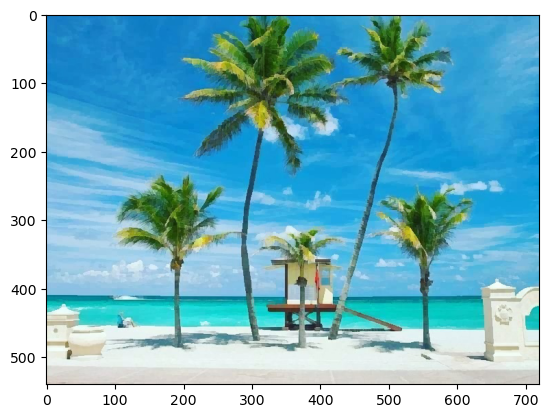

In [16]:
im = Image.open('beach-kfilt-mean.jpg')
plt.imshow(im)
plt.show() 
im = Image.open('beach-kfilt-gaus.jpg')
plt.imshow(im)
plt.show()

In [17]:
#with custom radius and variance to get a painting effect

image = cv2.imread('beach.jpg')

filt1 = kuwahara(image, method='mean', radius=4)
filt2 = kuwahara(image, method='gaussian', radius=4, sigma=1.5)

cv2.imwrite('beach-kfilt-mean.jpg', filt1)
cv2.imwrite('beach-kfilt-gaus.jpg', filt2)

True

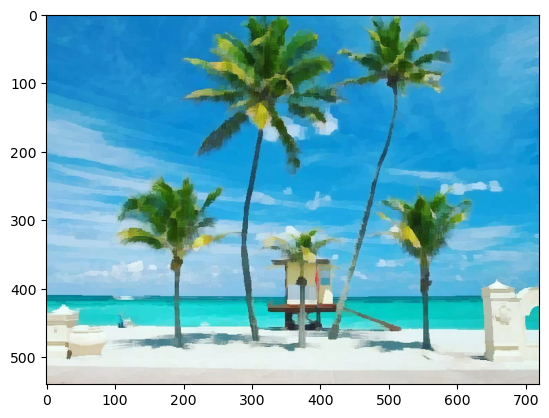

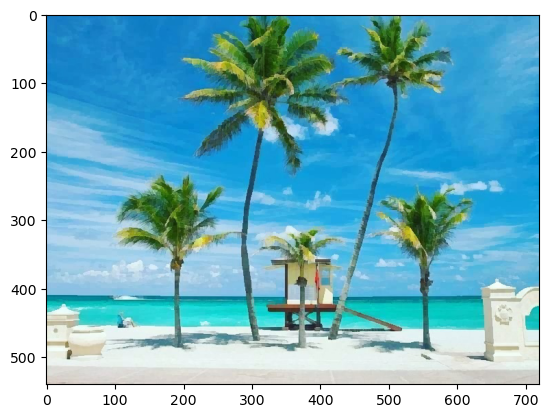

In [18]:
im = Image.open('beach-kfilt-mean.jpg')
plt.imshow(im)
plt.show() 
im = Image.open('beach-kfilt-gaus.jpg')
plt.imshow(im)
plt.show()

In [19]:
#Color iamges are grayscaled and these channels are used to calculate variance and
#right color conversion is done.

# using float32 

image = cv2.imread('beach.jpg')
image = (image / 255).astype('float32')     

lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
l, a, b = cv2.split(lab_image)

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_image)

filt1 = kuwahara(image, method='gaussian', radius=5, sigma=2., image_2d=l)
filt2 = kuwahara(image, method='gaussian', radius=5, sigma=2., image_2d=v)

cv2.imwrite('beach-kfilt-gaus1.jpg', filt1 * 255)
cv2.imwrite('beach-kfilt-gaus2.jpg', filt2 * 255)

True

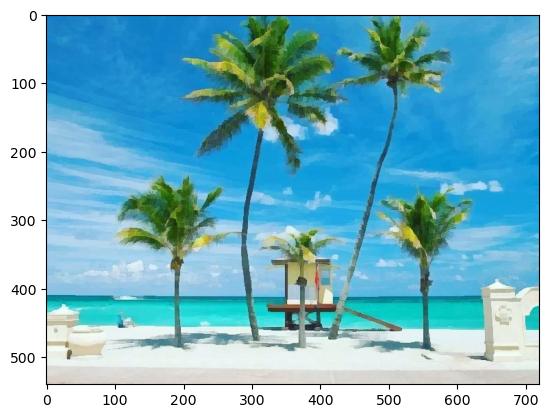

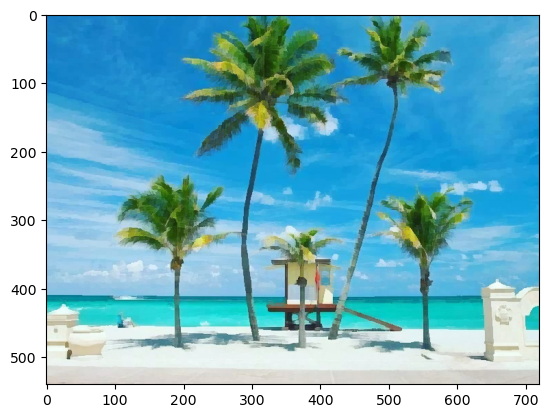

In [20]:
im = Image.open('beach-kfilt-gaus1.jpg')
plt.imshow(im)
plt.show() 
im = Image.open('beach-kfilt-gaus2.jpg')
plt.imshow(im)
plt.show() 